**Problem**: The goal is to develop a machine learning model that can predict which customers will leave the company (churn prediction).

Before modeling, the necessary data analysis and feature engineering steps must be performed.


**Task 1: Exploratory Data Analysis (EDA)**

Step 1: Identify numeric and categorical variables.

Step 2: Make necessary adjustments (e.g., variables with incorrect data types).

Step 3: Observe the distribution of numeric and categorical variables in the dataset.

Step 4: Examine categorical variables in relation to the target variable.

Step 5: Check for outliers.

Step 6: Check for missing values.

**Task 2: Feature Engineering**

Step 1: Handle missing and outlier observations.

Step 2: Create new features.

Step 3: Perform encoding for categorical variables.

Step 4: Standardize numeric variables.

**Task 3: Modeling**

Step 1: Build models using classification algorithms, check accuracy scores, and select the top 4 models.

Step 2: Perform hyperparameter optimization on the selected models, and rebuild the models using the optimized hyperparameters.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd 
from matplotlib import pyplot as plt
import missingno as msno

In [2]:
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.simplefilter(action="ignore")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [4]:
def data_load():
    data= pd.read_csv("Telco-Customer-Churn.csv")
    return data

**Task 1: Exploratory Data Analysis (EDA)**

In [5]:
df = data_load()

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [7]:
list(df.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(7043, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000,7043.000,7043.000,7032.000
mean,0.162,32.371,64.762,2283.300
std,0.369,24.559,30.090,2266.771
min,0.000,0.000,18.250,18.800
25%,0.000,9.000,35.500,401.450
50%,0.000,29.000,70.350,1397.475
75%,0.000,55.000,89.850,3794.738
max,1.000,72.000,118.750,8684.800


In [13]:
cat_cols = [col for col in df.columns 
            if (df[col].dtype == "O" or df[col].nunique() < 10) 
            and col != "customerID"]

num_cols = [col for col in df.columns if df[col].dtype != "O" and df[col].nunique() >= 10]

print(f" Categorical Variables: {cat_cols}")
print(f" Numeric Variables: {num_cols}")

 Categorical Variables: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
 Numeric Variables: ['tenure', 'MonthlyCharges', 'TotalCharges']


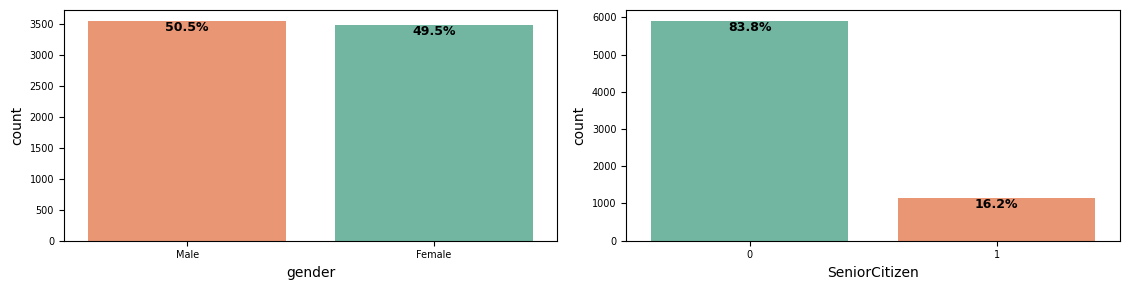

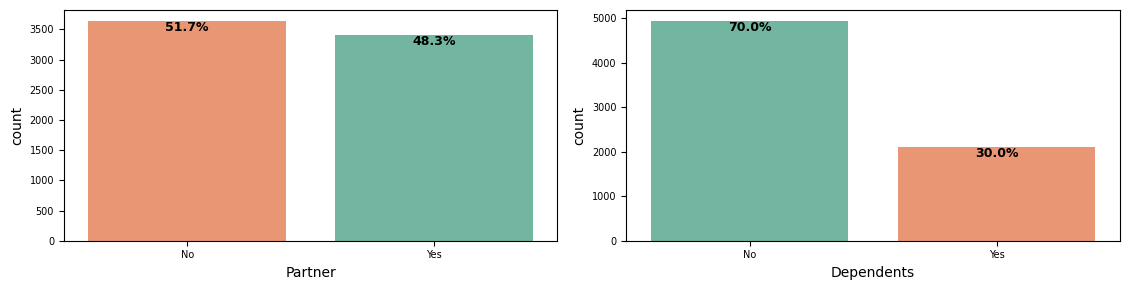

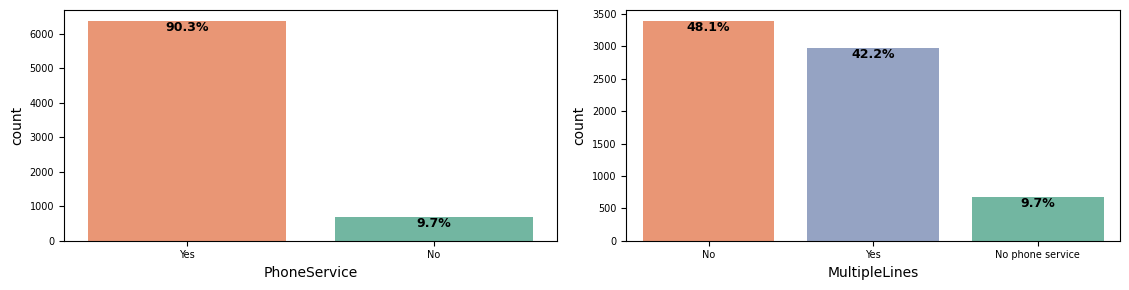

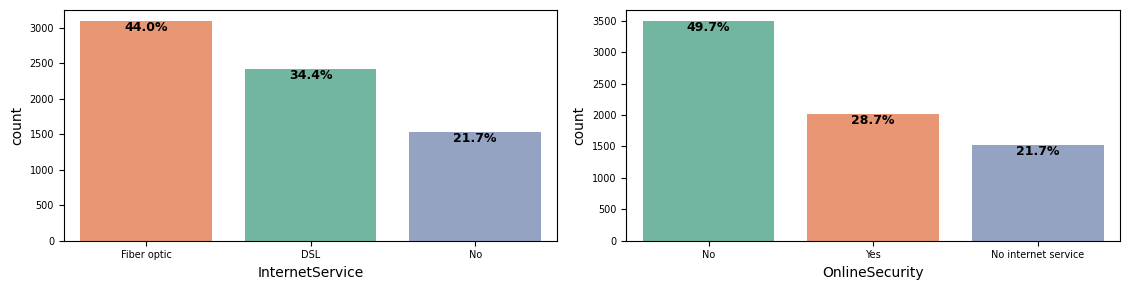

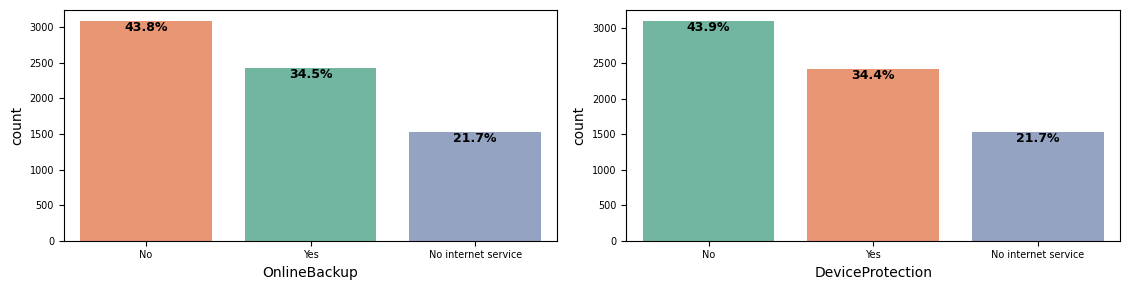

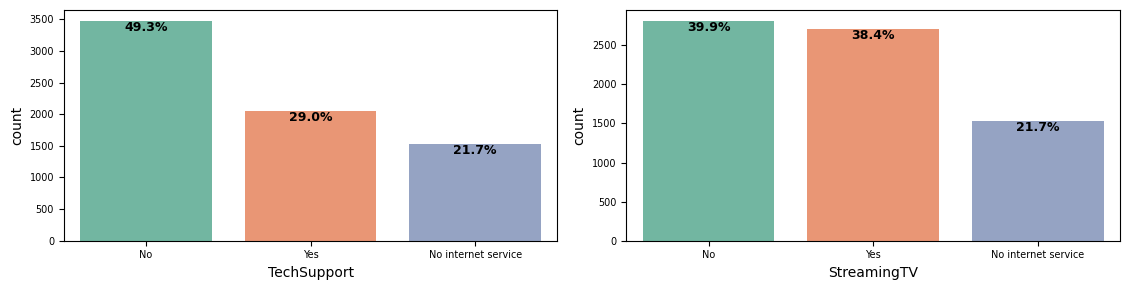

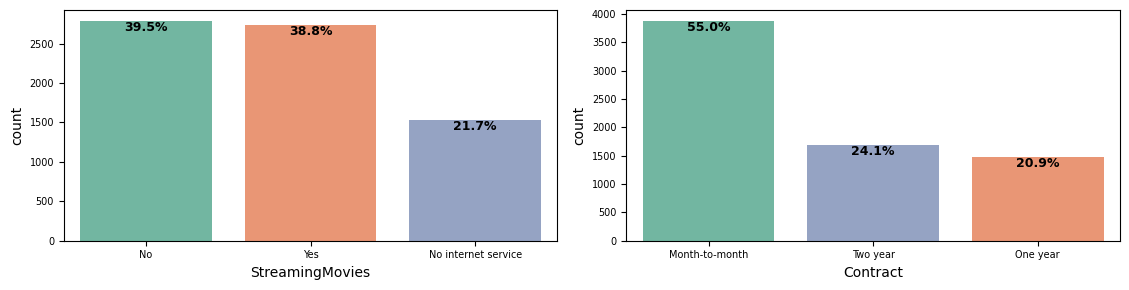

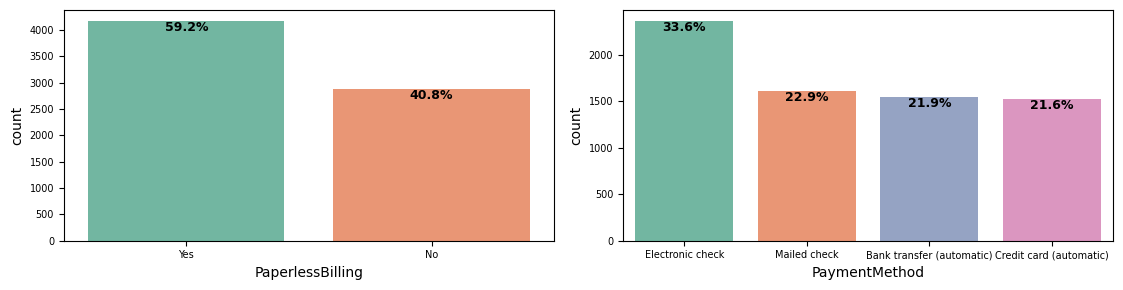

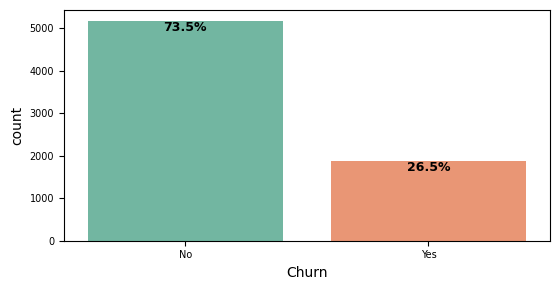

In [14]:
for i in range(0, len(cat_cols), 2):
    cols_to_plot = cat_cols[i:i+2]
    n = len(cols_to_plot)
    fig, axes = plt.subplots(1, n, figsize=(5.7 * n, 3))

    if n == 1:
        axes = [axes]

    for ax, col in zip(axes, cols_to_plot):
        total = len(df[col]) 
        order = df[col].value_counts().index

        sns.countplot(data=df, x=col, hue=col, order=order, ax=ax, palette="Set2", legend=False)

        for p in ax.patches:
            count = int(p.get_height())
            percent = 100 * count / total
            ax.annotate(f'{percent:.1f}%', 
                        (p.get_x() + p.get_width() / 2, p.get_height()), 
                        ha='center', va='top', fontsize=9, color='black', fontweight='bold')

        ax.tick_params(axis='x', labelsize=7)
        ax.tick_params(axis='y', labelsize=7)

    plt.tight_layout()
    plt.show()

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


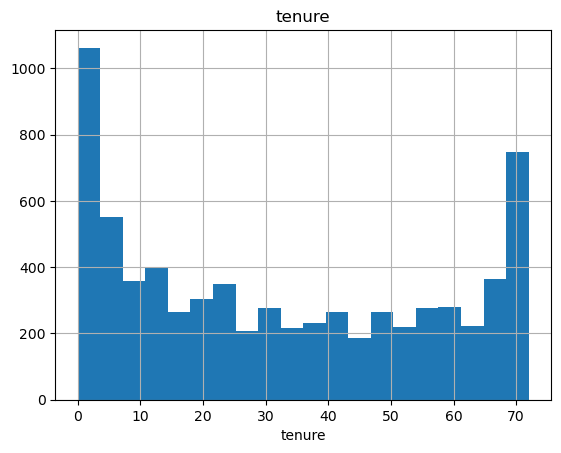

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


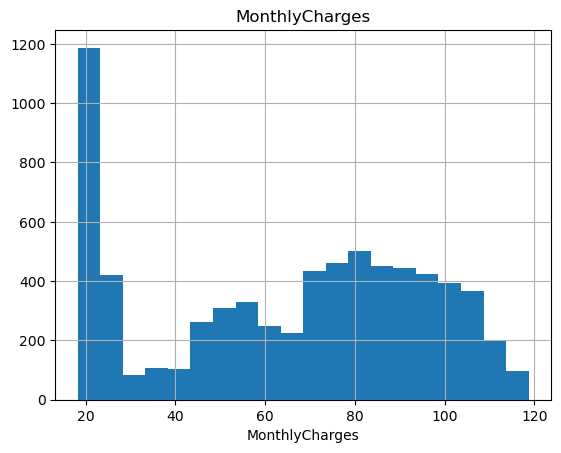

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


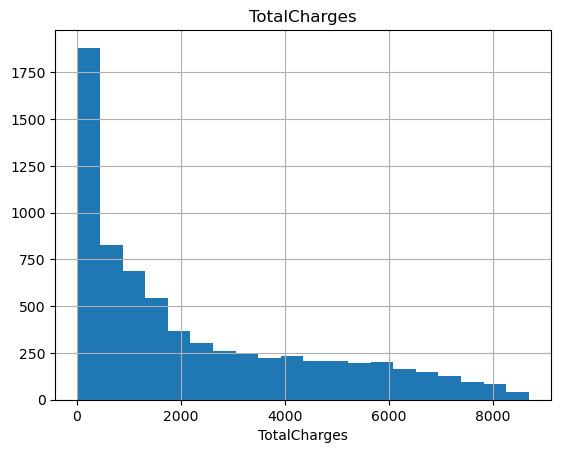

In [15]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)

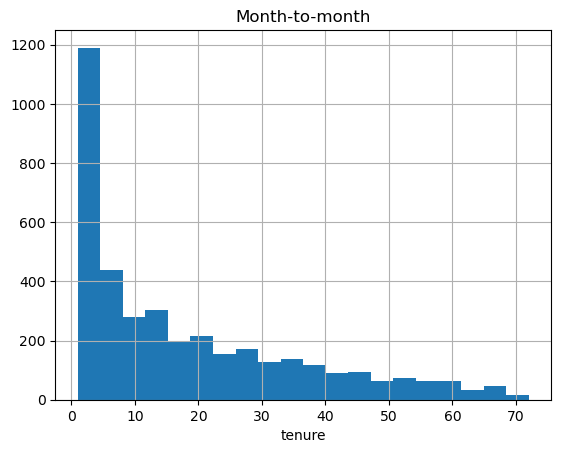

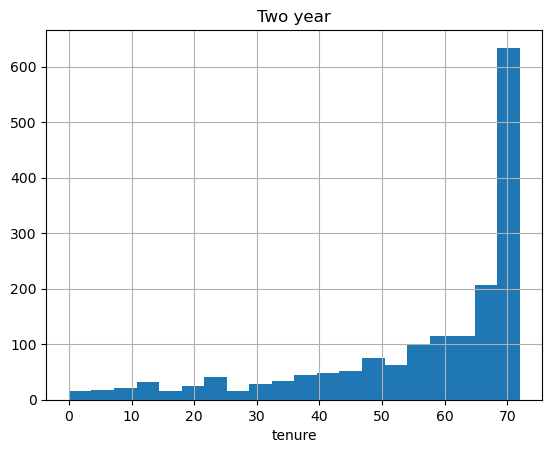

In [16]:
df[df["Contract"] == "Month-to-month"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Month-to-month")
plt.show()

df[df["Contract"] == "Two year"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Two year")
plt.show()

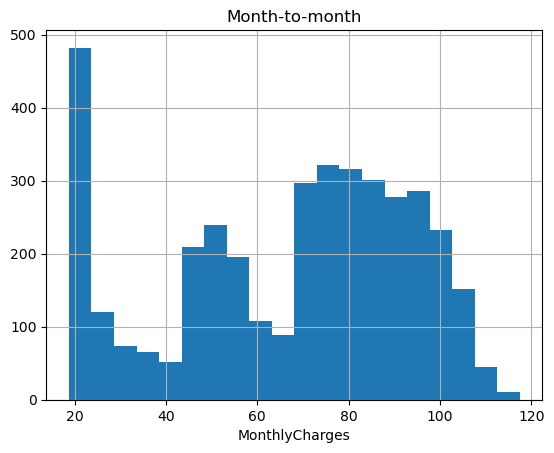

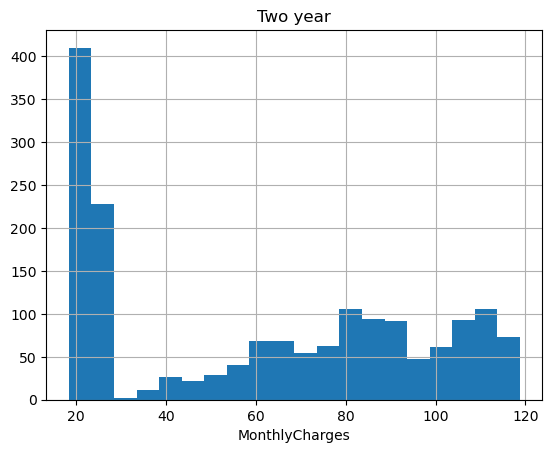

In [17]:
df[df["Contract"] == "Month-to-month"]["MonthlyCharges"].hist(bins=20)
plt.xlabel("MonthlyCharges")
plt.title("Month-to-month")
plt.show()

df[df["Contract"] == "Two year"]["MonthlyCharges"].hist(bins=20)
plt.xlabel("MonthlyCharges")
plt.title("Two year")
plt.show()

ANALYSIS OF NUMERICAL VARIABLES BY TARGET

In [18]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Churn", col)


       tenure
Churn        
No     37.570
Yes    17.979


       MonthlyCharges
Churn                
No             61.265
Yes            74.441


       TotalCharges
Churn              
No         2555.344
Yes        1531.796




In [19]:
corr = df[num_cols].corr()
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000,0.248,0.826
MonthlyCharges,0.248,1.000,0.651
TotalCharges,0.826,0.651,1.000


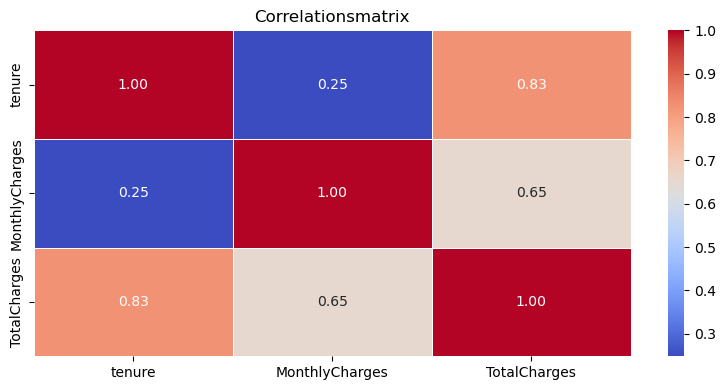

In [20]:
# Heatmap 
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlationsmatrix")
plt.tight_layout()
plt.show()

In [21]:
df["Churn_Num"] = df["Churn"].map({"Yes": 1, "No": 0})

In [22]:
for col in cat_cols:
    if col != "Churn":
        churn_rate = df.groupby(col)["Churn_Num"].mean().sort_values(ascending=False)
        print(f"\nChurn rates by variable {col}:\n")
        print(churn_rate)


Churn rates by variable gender:

gender
Female   0.269
Male     0.262
Name: Churn_Num, dtype: float64

Churn rates by variable SeniorCitizen:

SeniorCitizen
1   0.417
0   0.236
Name: Churn_Num, dtype: float64

Churn rates by variable Partner:

Partner
No    0.330
Yes   0.197
Name: Churn_Num, dtype: float64

Churn rates by variable Dependents:

Dependents
No    0.313
Yes   0.155
Name: Churn_Num, dtype: float64

Churn rates by variable PhoneService:

PhoneService
Yes   0.267
No    0.249
Name: Churn_Num, dtype: float64

Churn rates by variable MultipleLines:

MultipleLines
Yes                0.286
No                 0.250
No phone service   0.249
Name: Churn_Num, dtype: float64

Churn rates by variable InternetService:

InternetService
Fiber optic   0.419
DSL           0.190
No            0.074
Name: Churn_Num, dtype: float64

Churn rates by variable OnlineSecurity:

OnlineSecurity
No                    0.418
Yes                   0.146
No internet service   0.074
Name: Churn_Num, dtype:

MISSING VALUE ANALYSIS

In [23]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
Churn_Num            0
dtype: int64

In [24]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)


              n_miss  ratio
TotalCharges      11  0.160


In [25]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

In [26]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Churn_Num           0
dtype: int64

OUTLIER ANALYSIS

In [27]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper= Q3 + 1.5 * IQR

    outlier = df[(df[col] < lower) | (df[col] > upper)]

    print(f"There are {len(outlier)} Outliers in the variable {col}.")

There are 0 Outliers in the variable tenure.
There are 0 Outliers in the variable MonthlyCharges.
There are 0 Outliers in the variable TotalCharges.


In [28]:
dfe = df.copy() 


In [29]:
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"


# Designate customers with a 1 or 2-year contract as Engaged
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

# Persons who do not receive any support, backup or protection
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

# Customers who have a monthly contract and are young
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)


# Total number of services received by the person
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)


# People who receive any streaming service
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

# Does the person make automatic payments?
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

# average monthly payment
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)

#Increase in Current Price compared to average price
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

# Fee per service
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)

In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Num,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No,0,0-1 Year,0,1,1,1,0,0,14.925,0.500,14.925
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No,0,2-3 Year,1,1,0,3,0,0,53.986,0.948,14.238
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes,1,0-1 Year,0,1,1,3,0,0,36.050,0.669,13.463
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No,0,3-4 Year,1,1,0,3,0,1,40.016,0.946,10.575
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes,1,0-1 Year,0,1,1,1,0,0,50.550,0.715,35.350


ENCODING

In [31]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

for col in binary_cols:
    df = label_encoder(df, col)

# One-Hot Encoding 
# cat_cols list update
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

df.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Churn_Num,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,SeniorCitizen_1,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,1,29.850,29.850,0,0,0-1 Year,0,1,1,1,0,0,14.925,0.500,14.925,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,34,1,0,56.950,1889.500,0,0,2-3 Year,1,1,0,3,0,0,53.986,0.948,14.238,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,2,1,1,53.850,108.150,1,1,0-1 Year,0,1,1,3,0,0,36.050,0.669,13.463,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,45,0,0,42.300,1840.750,0,0,3-4 Year,1,1,0,3,0,1,40.016,0.946,10.575,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,2,1,1,70.700,151.650,1,1,0-1 Year,0,1,1,1,0,0,50.550,0.715,35.350,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


Feature Scaling (Standart Scaling)

In [32]:
scaling_cols= ["tenure", "MonthlyCharges", "TotalCharges","NEW_AVG_Charges","NEW_Increase","NEW_AVG_Service_Fee"]

In [33]:
ss = StandardScaler()

df[scaling_cols] = ss.fit_transform(df[scaling_cols])
df.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Churn_Num,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,SeniorCitizen_1,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,-1.277,0,1,-1.160,-0.994,0,0,0-1 Year,0,1,1,1,0,0,-0.758,-0.238,-0.311,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0.066,1,0,-0.260,-0.173,0,0,2-3 Year,1,1,0,3,0,0,-0.118,-0.010,-0.410,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,-1.237,1,1,-0.363,-0.960,1,1,0-1 Year,0,1,1,3,0,0,-0.412,-0.152,-0.522,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0.514,0,0,-0.747,-0.195,0,0,3-4 Year,1,1,0,3,0,1,-0.347,-0.011,-0.939,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,-1.237,1,1,0.197,-0.940,1,1,0-1 Year,0,1,1,1,0,0,-0.174,-0.129,2.636,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['NEW_TENURE_YEAR'] = le.fit_transform(df['NEW_TENURE_YEAR'])


MODELING

In [35]:
df = df.drop("Churn_Num", axis=1)

In [36]:
df = df.drop("customerID", axis=1)

In [37]:
df.head()

,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee,SeniorCitizen_1,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,-1.277,0,1,-1.160,-0.994,0,0,0,1,1,1,0,0,-0.758,-0.238,-0.311,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0.066,1,0,-0.260,-0.173,0,2,1,1,0,3,0,0,-0.118,-0.010,-0.410,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,1,0,0,-1.237,1,1,-0.363,-0.960,1,0,0,1,1,3,0,0,-0.412,-0.152,-0.522,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0.514,0,0,-0.747,-0.195,0,3,1,1,0,3,0,1,-0.347,-0.011,-0.939,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,0,0,0,-1.237,1,1,0.197,-0.940,1,0,0,1,1,1,0,0,-0.174,-0.129,2.636,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


DATA IMBALANCE HANDLING (SMOTE)

In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [39]:
linear_cols = [col for col in df.columns if df[col].dtype=='bool' or (df[col].dtype=='object' and df[col].nunique()<=10)]
X_linear = pd.get_dummies(df[linear_cols], drop_first=True)

In [40]:
X = df.drop(["Churn"], axis=1)
y = df["Churn"]

In [41]:
X_res, y_res = smote.fit_resample(X, y)

In [42]:
X_tree = df.drop("Churn", axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [46]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}


In [47]:
results = {}

for name, model in models.items():

    if name in ["RandomForest", "XGBoost", "CatBoost"]:
        X_use = X_tree
    else:  # LogisticRegression, KNN, SVM icin
        X_use = X_linear
    
    # Cross-validation
    cv_acc = cross_val_score(model, X_use, y, cv=5, scoring='accuracy').mean()
    cv_f1 = cross_val_score(model, X_use, y, cv=5, scoring='f1').mean()
 
    model.fit(X_use, y)
    y_pred = model.predict(X_use)
    test_acc = accuracy_score(y, y_pred)
    test_f1 = f1_score(y, y_pred)
    
    results[name] = {"CV_Accuracy": cv_acc, "CV_F1": cv_f1, "Test_Accuracy": test_acc, "Test_F1": test_f1}

results_df = pd.DataFrame(results).T
results_df

,CV_Accuracy,CV_F1,Test_Accuracy,Test_F1
LogisticRegression,0.785,0.555,0.789,0.565
RandomForest,0.788,0.562,0.997,0.995
XGBoost,0.780,0.551,0.947,0.897
CatBoost,0.799,0.576,0.880,0.752
KNN,0.751,0.495,0.804,0.612
SVM,0.779,0.527,0.792,0.549


In [48]:
#RandomForest, XGBoost, CatBoost and LogisticRegression are selected
#param grid
param_grids = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [None, 5, 10],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1, 0.2],
            "subsample": [0.8, 1]
        }
    },
    "CatBoost": {
        "model": CatBoostClassifier(verbose=0, random_state=42),
        "params": {
            "iterations": [200, 500],
            "depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1],
            "l2_leaf_reg": [1, 3, 5]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["lbfgs", "liblinear"]
        }
    }
}

In [49]:
from sklearn.metrics import make_scorer, f1_score

In [50]:
#GridSearchCV optimizasion

best_models = {}
scorer = make_scorer(f1_score)  # churn dengesiz olabilir → f1 kullan

for name, mp in param_grids.items():
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, scoring=scorer, n_jobs=-1)
    
    # Hangi feature set kullanılacak?
    if name in ["RandomForest", "XGBoost", "CatBoost"]:
        X_use = X_tree
    else:
        X_use = X_linear
    
    grid.fit(X_use, y)
    best_models[name] = grid.best_estimator_
    
    print(f"{name} best params: {grid.best_params_}")
    print(f"{name} best CV F1: {grid.best_score_:.4f}\n")

RandomForest best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForest best CV F1: 0.5768

XGBoost best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
XGBoost best CV F1: 0.5834

CatBoost best params: {'depth': 3, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
CatBoost best CV F1: 0.5854

LogisticRegression best params: {'C': 10, 'solver': 'lbfgs'}
LogisticRegression best CV F1: 0.5551



In [51]:
best_models

{'RandomForest': RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, ...),
 'CatBoost': <catboost.core.CatBoostClassifier at 0x18a31b0c740>,
 'LogisticRegression': LogisticRegression(C=1

| Model              | CV F1  | Best Params                                                                                 |
| ------------------ | ------ | ------------------------------------------------------------------------------------------- |
| RandomForest       | 0.5768 | {'max\_depth': 10, 'min\_samples\_leaf': 1, 'min\_samples\_split': 2, 'n\_estimators': 200} |
| XGBoost            | 0.5834 | {'learning\_rate': 0.1, 'max\_depth': 3, 'n\_estimators': 100, 'subsample': 0.8}            |
| CatBoost           | 0.5854 | {'depth': 3, 'iterations': 200, 'l2\_leaf\_reg': 1, 'learning\_rate': 0.1}                  |
| LogisticRegression | 0.5551 | {'C': 10, 'solver': 'lbfgs'}                                                                |


CV F1 scores range from 0.55–0.59 → no excessive overfitting, providing realistic performance.

CatBoost, XGBoost, and RandomForest provided better CV F1 values ​​(≈0.58).

CatBoost, in particular, had the highest CV F1 at 0.5854 → offering more balanced performance because it handles categorical data well.

RandomForest provided moderate performance with slightly deeper trees and a larger number of trees.

LogisticRegression CV F1 = 0.5551 → slightly lower than other models, but a simple and reliable baseline for unbalanced data.

Conclusion

Best model: CatBoost → CV F1 = 0.5854

Tree-based models generally performed better than the Linear model.

In [52]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

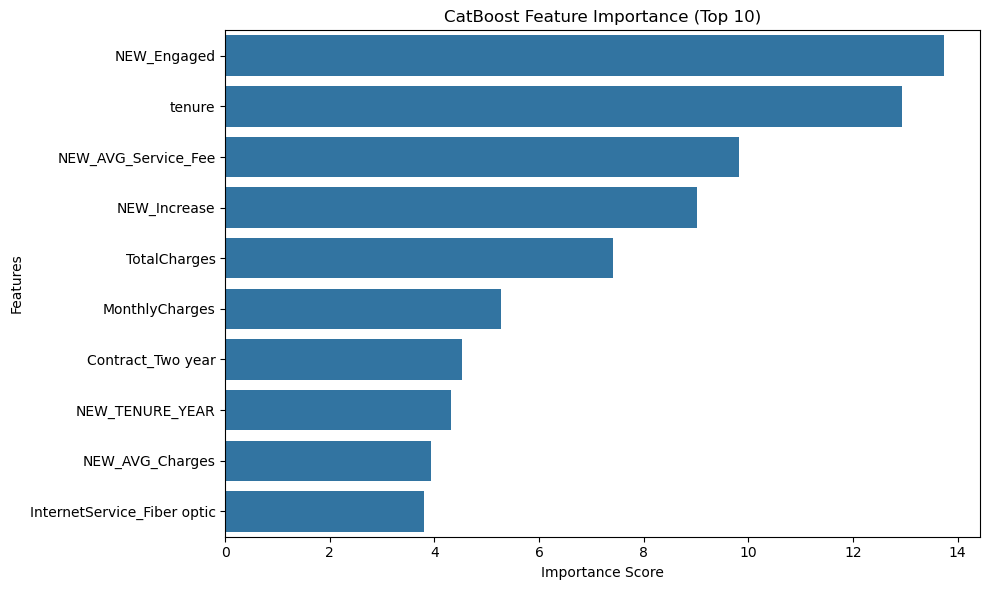


Top 10 Feature Importances:
 NEW_Engaged                   13.742
tenure                        12.931
NEW_AVG_Service_Fee            9.827
NEW_Increase                   9.021
TotalCharges                   7.414
MonthlyCharges                 5.278
Contract_Two year              4.534
NEW_TENURE_YEAR                4.317
NEW_AVG_Charges                3.936
InternetService_Fiber optic    3.807
dtype: float64


In [53]:
# En iyi CatBoost modelini kullan
best_catboost = best_models["CatBoost"] 

# Feature Importance değerlerini al
feature_imp = pd.Series(best_catboost.get_feature_importance(),
                        index=X_res.columns).sort_values(ascending=False)

# En önemli 10 özelliği görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp[:10], y=feature_imp[:10].index)
plt.title("CatBoost Feature Importance (Top 10)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("catboost_feature_importance.png")
plt.show()

# En önemli 10 özelliği ekrana bastır
print("\nTop 10 Feature Importances:\n", feature_imp[:10])

In [54]:
best_model = best_models["CatBoost"]

X_use = X_tree  # CatBoost tree-based

y_pred = best_model.predict(X_use)

In [55]:
test_acc = accuracy_score(y, y_pred)
test_f1 = f1_score(y, y_pred)

print(f"CatBoost Test Accuracy: {test_acc:.4f}")
print(f"CatBoost Test F1 Score: {test_f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y, y_pred))

CatBoost Test Accuracy: 0.8251
CatBoost Test F1 Score: 0.6327

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      5174
           1       0.71      0.57      0.63      1869

    accuracy                           0.83      7043
   macro avg       0.78      0.74      0.76      7043
weighted avg       0.82      0.83      0.82      7043



The model predicts the negative class (non-Churn) very well.

The positive class (Churn) should be more careful in its predictions → the recall is low. (Data imbalance?)


In [56]:
final_catboost = CatBoostClassifier(
    depth=3,
    iterations=200,
    l2_leaf_reg=1,
    learning_rate=0.1,
    verbose=0,
    random_state=42
)

In [57]:
final_catboost.fit(X_train, y_train)

# Predict
y_pred = final_catboost.predict(X_test)

In [58]:
print("CatBoost Test Accuracy:", accuracy_score(y_test, y_pred))
print("CatBoost Test F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

CatBoost Test Accuracy: 0.8236714975845411
CatBoost Test F1 Score: 0.8307834955957348

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1035
           1       0.80      0.87      0.83      1035

    accuracy                           0.82      2070
   macro avg       0.83      0.82      0.82      2070
weighted avg       0.83      0.82      0.82      2070




CatBoost ROC AUC Score: 0.9050



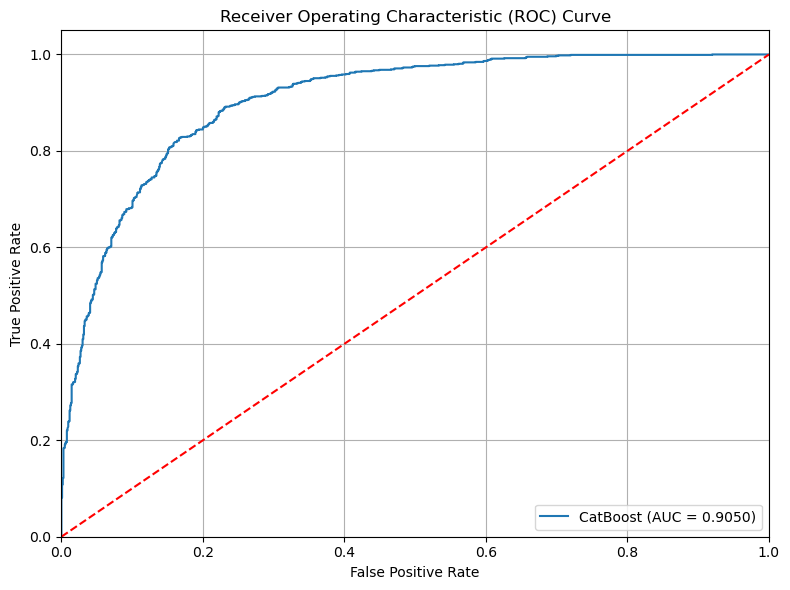

In [59]:
from sklearn.metrics import roc_auc_score, roc_curve

# Test setinde olasılıkları tahmin et
y_probs = final_catboost.predict_proba(X_test)[:, 1]

# ROC AUC Skorunu hesapla
roc_auc = roc_auc_score(y_test, y_probs)
print(f"\nCatBoost ROC AUC Score: {roc_auc:.4f}\n")

# ROC Eğrisini çiz
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'CatBoost (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("catboost_roc_curve.png")
plt.show()

### Conclusion and Business Insights

The modeling phase, conducted on SMOTE-balanced data, achieved a strong, well-generalized performance, validated by the high cross-validation scores:

| Metric | Score | Insight |
| :--- | :--- | :--- |
| **CV F1 Score** | **0.5854** | The model offers a balanced approach (Precision vs. Recall) and avoids overfitting, providing realistic performance expectations. |
| **Test Accuracy** | **~82.37%** | High overall classification accuracy on the test set. |
| **ROC AUC** | **0.9050** | Excellent ability to discriminate between Churn (1) and Non-Churn (0) classes. |

#### Key Business Drivers (Feature Importance)

The **CatBoost Feature Importance** analysis provides actionable insights for the business:

1.  **Contract Type (`NEW_Engaged`, `Contract_Two year`):** This is the single biggest driver of churn prediction. Customers with monthly contracts are significantly more likely to leave.
2.  **Tenure (`tenure`, `NEW_TENURE_YEAR`):** Customer longevity is a major factor. Customers in the early stages (0-1 Year) are highly volatile.
3.  **Spending Dynamics (`NEW_AVG_Service_Fee`, `NEW_Increase`):** Features reflecting the perceived cost per service and the price increase over time indicate that pricing sensitivity is a core reason for attrition.

**Actionable Strategy:**

Instead of targeting all customers, the company should focus retention efforts on the **high-risk segment** defined by: **Monthly Contract Holders** who are **early-stage customers** or those who have experienced a significant **increase in their perceived cost-per-service**.